# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city + '&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        resp = requests.get(city_url)

        # Check the status code before assigning the response to our usable data.
        if resp.status_code == 200:
            city_weather = resp.json()

        # Our request failed: skip to the next iteration after making this known.
        else:
            print("There was an error making the request to OpenWeatherApi.")
            pass

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get('coord').get('lat')
        city_lng = city_weather.get('coord').get('lon')
        city_max_temp = city_weather.get('main').get('temp_max')
        city_humidity = city_weather.get('main').get('humidity')
        city_clouds = city_weather.get('clouds').get('all')
        city_wind = city_weather.get('wind').get('speed')
        city_country = city_weather.get('sys').get('country')
        city_date = city_weather.get('dt')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # Wait a second so that we don't make the API mad at us.
        time.sleep(1)
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        time.sleep(1)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | antsiranana
Processing Record 4 of Set 1 | st. john's
Processing Record 5 of Set 1 | tolanaro
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | illizi
Processing Record 9 of Set 1 | waddan
Processing Record 10 of Set 1 | pasni
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | alice
Processing Record 14 of Set 1 | saipan
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | badger
Processing Record 17 of Set 1 | tinajo
Processing Record 18 of Set 1 | taiohae
There was an error making the request to OpenWeatherApi.
Processing Record 19 of Set 1 | cabedelo
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | stanley
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,25.11,84,65,10.45,GS,1716506884
1,vadso,70.0744,29.7487,58.08,81,40,9.22,NO,1716506885
2,antsiranana,-12.2787,49.2917,73.26,61,49,13.51,MG,1716506886
3,st. john's,47.5649,-52.7093,39.97,89,75,5.75,CA,1716506882
4,tolanaro,-25.0319,46.9987,66.27,82,20,2.30,MG,1716506888


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,25.11,84,65,10.45,GS,1716506884
1,vadso,70.0744,29.7487,58.08,81,40,9.22,NO,1716506885
2,antsiranana,-12.2787,49.2917,73.26,61,49,13.51,MG,1716506886
3,st. john's,47.5649,-52.7093,39.97,89,75,5.75,CA,1716506882
4,tolanaro,-25.0319,46.9987,66.27,82,20,2.30,MG,1716506888


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

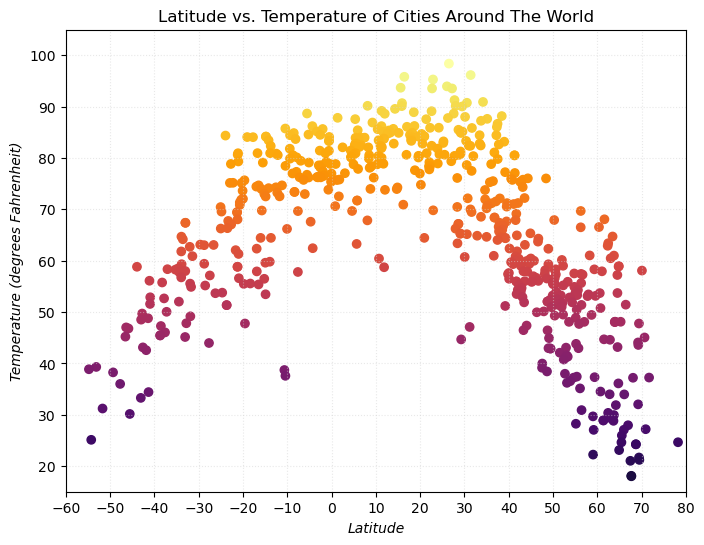

In [5]:
# Build scatter plot for latitude vs. Temperature.
# Step 1: data.
x = city_data_df.sort_values(by = 'Max Temp', ascending = False)['Lat']
y = city_data_df.sort_values(by = 'Max Temp', ascending = False)['Max Temp']

# Step 2: canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x, 
            y,
            c = y,
            cmap = 'inferno')

# Step 4: formatting.
plt.title('Latitude vs. Temperature of Cities Around The World', fontsize = 12)

plt.xlabel('Latitude', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(-100, 100, 10))
plt.xlim(-60, 80)

plt.ylabel('Temperature (degrees Fahrenheit)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(0, 150, 10))
plt.ylim(15, 105)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Step 5: save/show.
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

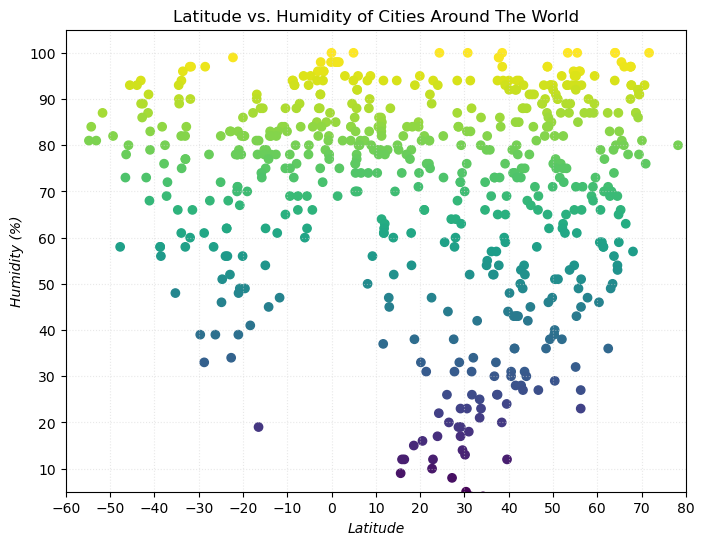

In [6]:
# Build the scatter plots for latitude vs. Humidity.
# Step 1: data.
x = city_data_df.sort_values(by = 'Humidity', ascending = False)['Lat']
y = city_data_df.sort_values(by = 'Humidity', ascending = False)['Humidity']

# Step 2: canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x, 
            y,
            c = y,
            cmap = 'viridis')

# Step 4: formatting.
plt.title('Latitude vs. Humidity of Cities Around The World', fontsize = 12)

plt.xlabel('Latitude', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(-100, 100, 10))
plt.xlim(-60, 80)

plt.ylabel('Humidity (%)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(0, 150, 10))
plt.ylim(5, 105)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Step 5: save/show.
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

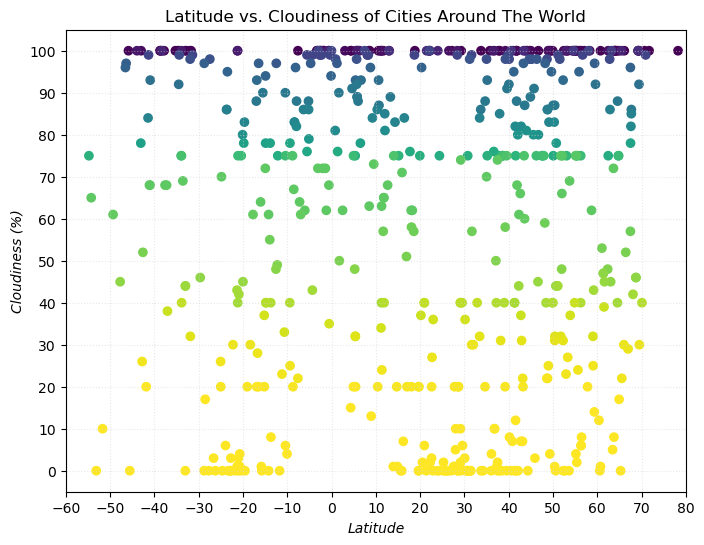

In [7]:
# Build the scatter plots for latitude vs. Cloudiness.
# Step 1: data.
x = city_data_df.sort_values(by = 'Cloudiness', ascending = False)['Lat']
y = city_data_df.sort_values(by = 'Cloudiness', ascending = False)['Cloudiness']

# Reversed for cmap so that our lower 'cloudiness' values show up as yellow and higher ones show up as dark purple.
c = city_data_df.sort_values(by = 'Cloudiness', ascending = True)['Cloudiness']

# Step 2: canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x, 
            y,
            c = c,
            cmap = 'viridis')

# Step 4: formatting.
plt.title('Latitude vs. Cloudiness of Cities Around The World', fontsize = 12)

plt.xlabel('Latitude', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(-100, 100, 10))
plt.xlim(-60, 80)

plt.ylabel('Cloudiness (%)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(0, 150, 10))
plt.ylim(-5, 105)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Step 5: save/show.
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

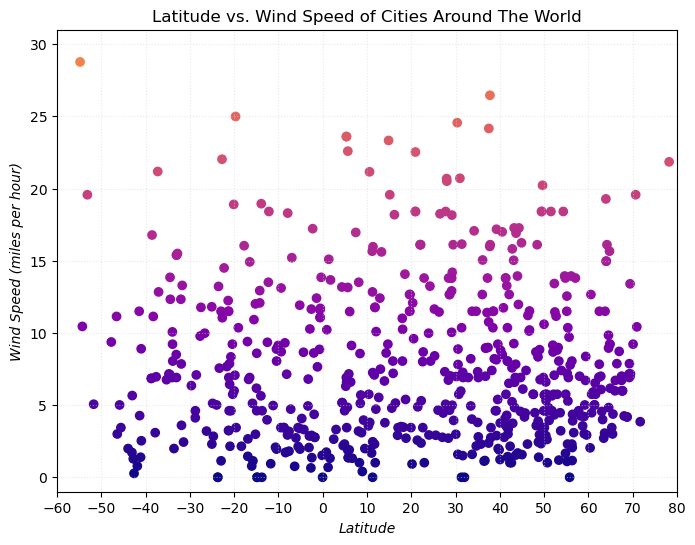

In [8]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x = city_data_df.sort_values(by = 'Wind Speed', ascending = False)['Lat']
y = city_data_df.sort_values(by = 'Wind Speed', ascending = False)['Wind Speed']

# Step 2: canvas.
plt.figure(figsize=(8, 6))

# Step 3: skeleton plot.
plt.scatter(x, 
            y,
            c = y,
            cmap = 'plasma')

# Step 4: formatting.
plt.title('Latitude vs. Wind Speed of Cities Around The World', fontsize = 12)

plt.xlabel('Latitude', fontsize = 10, fontstyle = 'italic')
plt.xticks(np.arange(-100, 100, 10))
plt.xlim(-60, 80)

plt.ylabel('Wind Speed (miles per hour)', fontsize = 10, fontstyle = 'italic')
plt.yticks(np.arange(0, 50, 5))
plt.ylim(-1, 31)

plt.grid(color = 'lightgray', linestyle = 'dotted', alpha = .5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
# Define a function to create Linear Regression plots
def lin_regress_plot(x_values, 
                     y_values,
                     c_values = None,
                     cmap_name = 'inferno',
                     s_values = None,
                     a_title = '', 
                     x_label = '',
                     x_ticks = None,
                     x_lim = [None, None],
                     y_label = '',
                     y_ticks = None,
                     y_lim = [None, None],
                     grid_values = {'color': 'lightgray', 'linestyle': 'dotted', 'alpha': .5},
                     reg_color = 'firebrick',
                     figname = 'sample.png'):

    # Do linear regression with 'linregress'
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Step 2: canvas.
    plt.figure(figsize=(8, 6))

    # Step 3: skeleton plot.
    plt.scatter(x_values,
                y_values,
                c = c_values if c_values != None else x_values,
                cmap = cmap_name,
                s = s_values)
    plt.plot(x_values, 
             regress_values, 
             color = reg_color)

    # Step 4: formatting.
    plt.title(a_title, fontsize = 12)

    plt.xlabel(x_label, fontsize = 10, fontstyle = 'italic')
    plt.xticks(x_ticks)
    plt.xlim(x_lim[0], x_lim[1])
    
    plt.ylabel(y_label, fontsize = 10, fontstyle = 'italic')
    plt.yticks(y_ticks)
    plt.ylim(y_lim[0], y_lim[1])

    # Set the 'line_eq' to appear in the bottom-left side of the plot.
    # This works well on average and doesn't require insane math to figure out where whitespace is on the canvas.
    plt.text(plt.xlim()[0],
             plt.ylim()[0],
             line_eq + ' | r-squared: ' + str(round(rvalue**2, 2)),
             color = reg_color)

    plt.grid(color = grid_values.get('color'), 
             linestyle = grid_values.get('linestyle'), 
             alpha = grid_values.get('alpha'))

    # Step 5: show/save.
    plt.savefig(figname)
    plt.show()

    return None

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0).
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vadso,70.0744,29.7487,58.08,81,40,9.22,NO,1716506885
3,st. john's,47.5649,-52.7093,39.97,89,75,5.75,CA,1716506882
5,bethel,41.3712,-73.4140,77.09,74,0,5.75,US,1716506889
7,illizi,26.4833,8.4667,98.40,20,100,18.25,DZ,1716506892
8,waddan,29.1614,16.1390,84.94,19,74,18.16,LY,1716506893


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0).
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,25.11,84,65,10.45,GS,1716506884
2,antsiranana,-12.2787,49.2917,73.26,61,49,13.51,MG,1716506886
4,tolanaro,-25.0319,46.9987,66.27,82,20,2.30,MG,1716506888
6,port-aux-francais,-49.3500,70.2167,38.25,82,61,41.32,TF,1716506890
10,alofi,-19.0595,-169.9187,84.09,70,20,10.36,NU,1716506683


###  Temperature vs. Latitude Linear Regression Plot

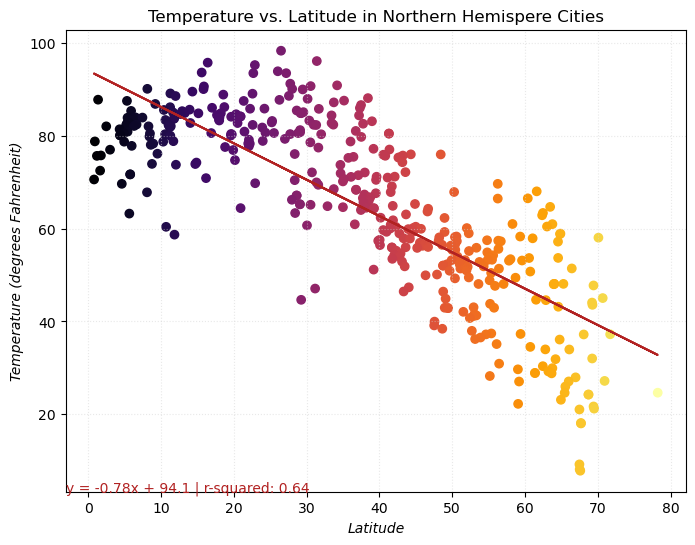

In [12]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df.sort_values(by = 'Max Temp', ascending = False)['Lat'],
                 northern_hemi_df.sort_values(by = 'Max Temp', ascending = False)['Max Temp'],
                 a_title = 'Temperature vs. Latitude in Northern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Temperature (degrees Fahrenheit)')

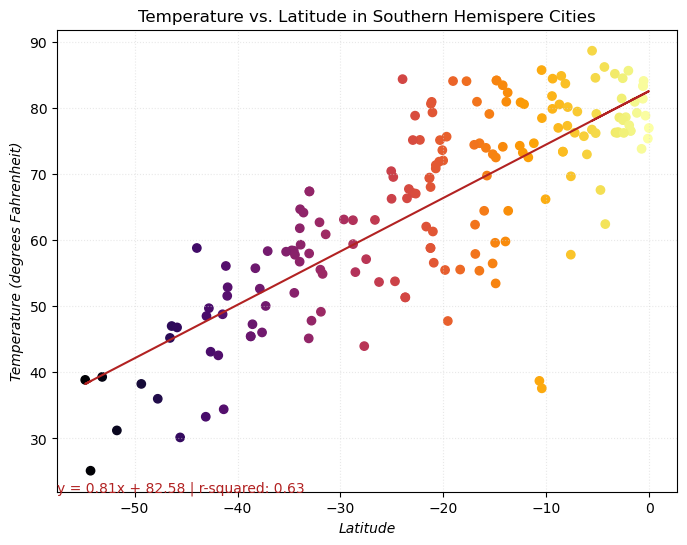

In [13]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df.sort_values(by = 'Max Temp', ascending = False)['Lat'],
                 southern_hemi_df.sort_values(by = 'Max Temp', ascending = False)['Max Temp'],
                 a_title = 'Temperature vs. Latitude in Southern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Temperature (degrees Fahrenheit)')

**Discussion about the linear relationship:**  
Both of these graphs make sense: as the latitude approaches 0, the temperature is higher.  
Considering that some of the hottest avg. temperatures that the Earth has are around the Equator... these relationships make a lot of sense.  
For the northern hemisphere data: our relationship is negative (r-squared: .64 - indicating a fairly strong relationship) and this aligns with what we would expect for the value. I would also expect that if our list of cities were larger the data would see a stronger relationship. Our linear regression model is showing us that as the Latitude gets closer to 0, the temperature is hotter.  
For the southern hemisphere data: our relationship is positive(r-squared: .63 - again, indicating a fiarly strong relationship) and, yet again, this aligns with what we expect from the data. These values would have a stronger relationship if there were more data in the set to put onto the visualization. The linear regression for the southern hemisphere shows the same as the northern hemisphere but reversed: we start at negative values for latitude and as the points approach a latitude of 0, the temperature is higher.

### Humidity vs. Latitude Linear Regression Plot

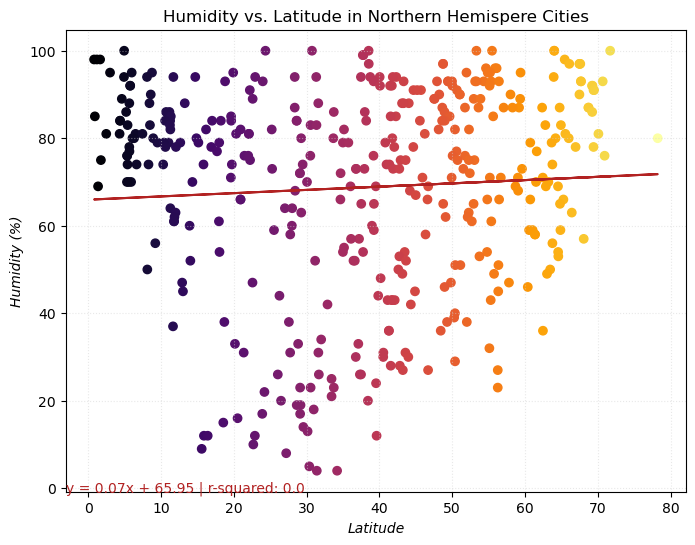

In [14]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df.sort_values(by = 'Humidity', ascending = False)['Lat'],
                 northern_hemi_df.sort_values(by = 'Humidity', ascending = False)['Humidity'],
                 a_title = 'Humidity vs. Latitude in Northern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Humidity (%)')

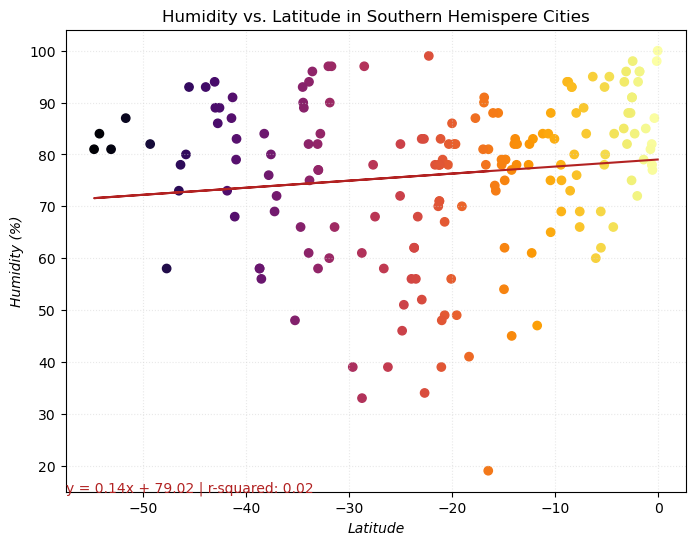

In [15]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df.sort_values(by = 'Humidity', ascending = False)['Lat'],
                 southern_hemi_df.sort_values(by = 'Humidity', ascending = False)['Humidity'],
                 a_title = 'Humidity vs. Latitude in Southern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Humidity (%)')

**Discussion about the linear relationship:**  
These graphs have similar output in that there is little to no relationship between the two series of data.  
The linear regression model attempts to show us a relationship between latitude and humidity for both the hemispheres; however, the data is spread out too much for there to be a relationship between these values.  
Our linear regression for each of these graphs represents this, as well as the r-squared value associated with the regression.  
In both cases: the r-squared value is 0. No relationship exists between these two series for either hemisphere.  

### Cloudiness vs. Latitude Linear Regression Plot

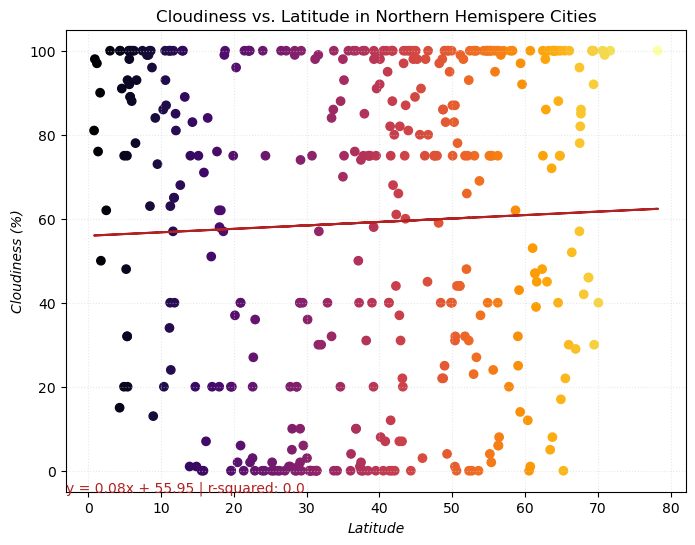

In [16]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df.sort_values(by = 'Cloudiness', ascending = False)['Lat'],
                 northern_hemi_df.sort_values(by = 'Cloudiness', ascending = False)['Cloudiness'],
                 a_title = 'Cloudiness vs. Latitude in Northern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Cloudiness (%)')

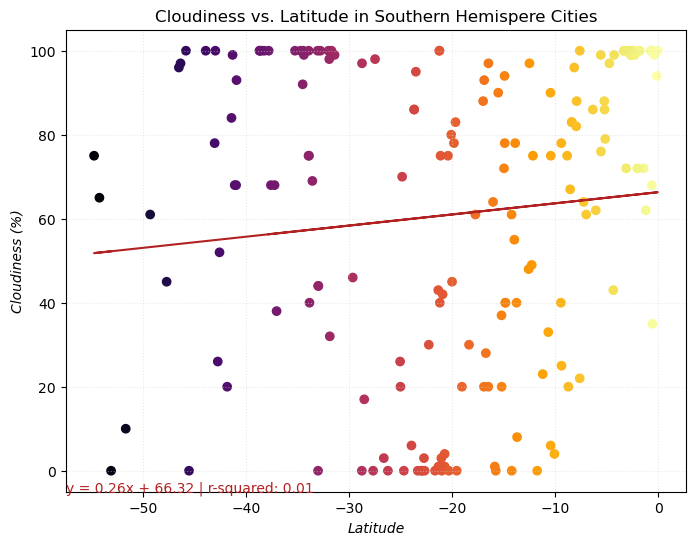

In [17]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df.sort_values(by = 'Cloudiness', ascending = False)['Lat'],
                 southern_hemi_df.sort_values(by = 'Cloudiness', ascending = False)['Cloudiness'],
                 a_title = 'Cloudiness vs. Latitude in Southern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Cloudiness (%)')

**Discussion about the linear relationship:**  
Again, these graphs have similar output in that there is little to no relationship between the two series of data.  
It appears that cloudiness and latitude do not have a strong relationship between themselves either in the northern hemisphere or the southern hemisphere.  
Our linear regression for each of these graphs represents this, as well as the r-squared value associated with the regression.  
In both cases: the r-squared value is 0. No relationship exists between these two series for either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

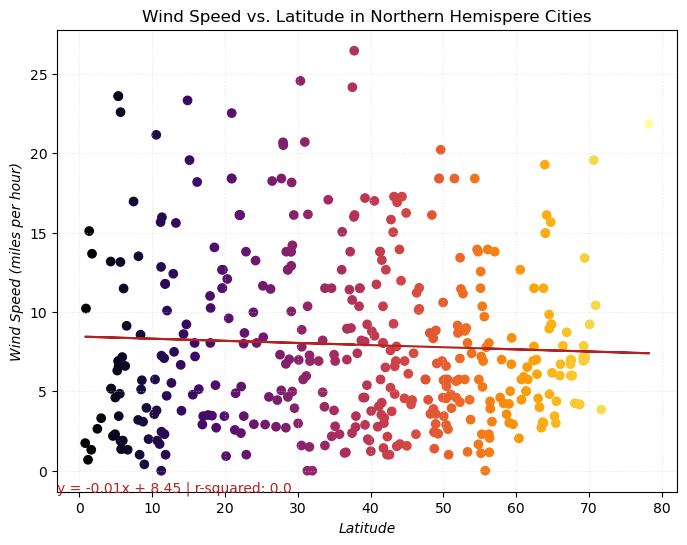

In [18]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df.sort_values(by = 'Wind Speed', ascending = False)['Lat'],
                 northern_hemi_df.sort_values(by = 'Wind Speed', ascending = False)['Wind Speed'],
                 a_title = 'Wind Speed vs. Latitude in Northern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Wind Speed (miles per hour)')

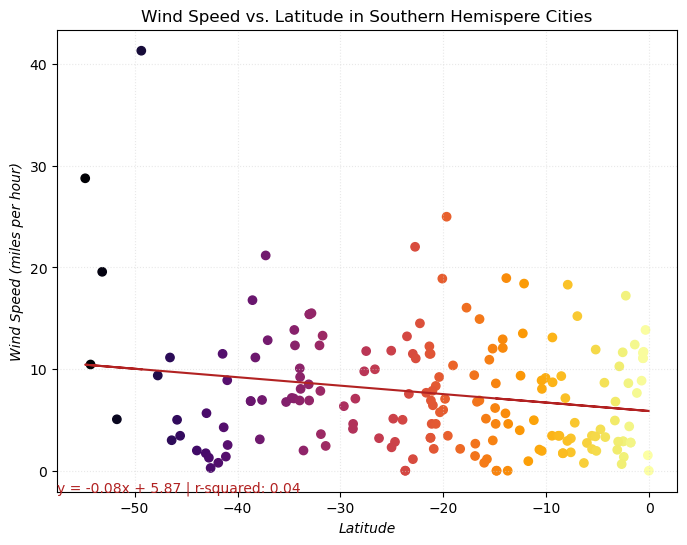

In [19]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df.sort_values(by = 'Wind Speed', ascending = False)['Lat'],
                 southern_hemi_df.sort_values(by = 'Wind Speed', ascending = False)['Wind Speed'],
                 a_title = 'Wind Speed vs. Latitude in Southern Hemispere Cities',
                 x_label = 'Latitude',
                 y_label = 'Wind Speed (miles per hour)')

**Discussion about the linear relationship:**  
Yet again, these graphs have similar output in that there is little to no relationship between the two series of data.  
Wind speed and latitude do not appear to have a relationship between each other in these representations.  
Our linear regression for each of these graphs represents this, as well as the r-squared value associated with the regression.  
In both cases: the r-squared value is ~0. No relationship exists between these two series for either hemisphere.